## For Visualisation use the GeoTools Library

In [10]:
from pyDTDM import *
import warnings
import yaml
try:
    from yaml import Cloader as Loader
except ImportError:

    from yaml import Loader

import matplotlib.cm as cm
import cmcrameri.cm as cmc
import matplotlib.patches as mpatches
import os, sys
import cartopy.crs as ccrs
import warnings

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
Etopo_REED = get_cpt.get_cmap('ETOPO1-Reed.cpt')

In [2]:
config_file="InputFiles/phase2NNR_EBM.yaml"
with open(config_file) as f:
    PARAMS = yaml.load(f, Loader=Loader)
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print(" Parameters set from %s" % config_file)
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")


––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
 Parameters set from InputFiles/phase2NNR_EBM.yaml
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 


In [3]:
# Input Files 
MODEL_NAME=PARAMS['InputFiles']['plate_kinematics']['model_name'] # model name
MODEL_DIR = PARAMS['InputFiles']['plate_kinematics']['model_dir']  ## plate model location
topology_filenames =[f"{MODEL_DIR}/{i}" for i in PARAMS['InputFiles']['plate_kinematics']['topology_files']]
rotation_filenames = [f"{MODEL_DIR}/{i}" for i in PARAMS['InputFiles']['plate_kinematics']['rotation_files']]
agegrid=PARAMS['InputFiles']['plate_kinematics']['agegrid'] ## agegrid location

ETOPO_FILE=PARAMS['InputFiles']['Raster']['ETOPO_FILE'] # ETOPO grid in meters (can be netCDf or GeoTiff)
ETOPO_Type=PARAMS['InputFiles']['Raster']['Raster_type']
coastlines = f"{MODEL_DIR }/{PARAMS['InputFiles']['plate_kinematics']['coastline_file']}"
static_polygon_file=f"{MODEL_DIR }/{PARAMS['InputFiles']['plate_kinematics']['static_polygon']}"
static_polygons = pygplates.FeatureCollection(static_polygon_file)
continents=f"{MODEL_DIR }/{PARAMS['InputFiles']['plate_kinematics']['continents']}"
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print("Reading input file..... \n")
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print(f"Plate Model: {MODEL_NAME} \n")
print(f"Model Directory: {MODEL_DIR} \n")
print(f"Coastlines: {coastlines} \n")
print(f"Continents: {continents} \n")
print(f"Static Polygons: {static_polygon_file} \n")
print(f"Model Agegrid: {agegrid} \n")
print(f"ETopo grid: {ETOPO_FILE}")
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– \n")

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
Reading input file..... 

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
Plate Model: phase2NNR 

Model Directory: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/Zahirovic_etal_2022_GDJ_NNR 

Coastlines: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/Zahirovic_etal_2022_GDJ_NNR/StaticGeometries/Coastlines/Global_coastlines_low_res.shp 

Continents: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/Zahirovic_etal_2022_GDJ_NNR/StaticGeometries/ContinentalPolygons/Global_EarthByte_GPlates_PresentDay_ContinentalPolygons.shp 

Static Polygons: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/Zahirovic_etal_2022_GDJ_NNR/StaticGeometries/StaticPolygons/Global_EarthByte_GPlates_PresentDay_StaticPlatePolygons.shp 

Model Agegrid: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/SeafloorAg 

ETopo grid: /Us

In [4]:
Paleomag_ID=PARAMS['Parameters']['paleomag_id']
Mantle_ID=PARAMS['Parameters']['mantle_optimised_id']

#The initial positions of crustal points are evenly distributed within the designated region. 
# At mesh refinement level zero, the points are approximately 20 degrees apart.
# Each increase in the density level results in a halving of the spacing between points.
MESH_REFINEMENT_LEVEL=PARAMS['Parameters']['mesh_refinement_level']  # higher refinement level will take longer time to run for optimisation 
WINDOW_SIZE=PARAMS['Parameters']['time_window_size']
Weighted=PARAMS['Parameters']['weighted_mean']


NETCDF_GRID_RESOLUTION=PARAMS['GridParameters']['grid_spacing']  # in degree
ZLIB=PARAMS['GridParameters']['compression']['zlib'] 
COMPLEVEL=PARAMS['GridParameters']['compression']['complevel'] 

FROM_TIME=int(PARAMS['TimeParameters']['time_max'])
TO_TIME=int(PARAMS['TimeParameters']['time_min'])
TIME_STEPS=int(PARAMS['TimeParameters']['time_step'])




parallel=PARAMS['Parameters']['number_of_cpus']### No of core to use or None for single core


print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print("The following parameters are set-")
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print(f"NNR Mantle Reference Frame ID: {Mantle_ID}")
print(f"Paleomagnetic Reference Frame ID: {Paleomag_ID} \n")

print(f"Moving Window Size: {WINDOW_SIZE}")
print(f"Weighted Mean: {Weighted}")

print(f"Mesh Refinement Level: {MESH_REFINEMENT_LEVEL}")
print(f"NetCDF GRID Resolution: {NETCDF_GRID_RESOLUTION}")
print(f"NetCDF Compression Level: {COMPLEVEL} \n")
print(f"Model Start Time: {FROM_TIME}")
print(f"Model End Time: {TO_TIME}")
print(f"Model Time Step: {TIME_STEPS}\n")


print(f"Number of CPU: {parallel}") # -1 means all the freely available CPU


print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
The following parameters are set-
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
NNR Mantle Reference Frame ID: 666666
Paleomagnetic Reference Frame ID: 0 

Moving Window Size: 15.0
Weighted Mean: True
Mesh Refinement Level: 9
NetCDF GRID Resolution: 0.1
NetCDF Compression Level: 5 

Model Start Time: 35
Model End Time: 0
Model Time Step: 1

Number of CPU: -1
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 


In [5]:
# Output Directory
OUTPUT_FOLDER=PARAMS['OutputFiles']['output_dir']

DEFAULT_OUTPUT_CSV=os.path.join(OUTPUT_FOLDER,'CSV')  # folder to store output in Tabular format
DEFAULT_OUTPUT_NetCDF=os.path.join(OUTPUT_FOLDER,'NetCDF') # folder to store output NetCDF grid
DEFAULT_OUTPUT_Figure=os.path.join(OUTPUT_FOLDER,'Figure')




print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print(f"All the output will be saved in {OUTPUT_FOLDER}")
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
create_directory_if_not_exists(OUTPUT_FOLDER)
create_directory_if_not_exists(DEFAULT_OUTPUT_CSV)
create_directory_if_not_exists(DEFAULT_OUTPUT_NetCDF)
create_directory_if_not_exists(DEFAULT_OUTPUT_Figure)
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")


––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
All the output will be saved in /Volumes/Satyam/EBMTestForBHP
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 


In [6]:
# Input Files 
MANTLE_MODEL_NAME=PARAMS['InputFiles']['mantle_convection']['model_name']
MANTLE_MODEL_DIR = PARAMS['InputFiles']['mantle_convection']['model_dir']  ## plate model
MANTLE_topology_filenames =[f"{MODEL_DIR}/{i}" for i in PARAMS['InputFiles']['mantle_convection']['topology_files']]
MANTLE_rotation_filenames = [f"{MODEL_DIR}/{i}" for i in PARAMS['InputFiles']['mantle_convection']['rotation_files']]

MANTLE_depths= PARAMS['InputFiles']['mantle_convection']['depth']
MANTLE_vel_folder=PARAMS['InputFiles']['mantle_convection']['new_vel_folder']
MANTLE_temp_folder=PARAMS['InputFiles']['mantle_convection']['new_temp_folder']

MANTLE_org_vel=PARAMS['InputFiles']['mantle_convection']['original_vel_folder']
MANTLE_org_temp=PARAMS['InputFiles']['mantle_convection']['original_temp_folder']


MANTLE_velx_folder=PARAMS['InputFiles']['mantle_convection']['new_velx_folder']
MANTLE_org_velx=PARAMS['InputFiles']['mantle_convection']['original_velx_folder']

MANTLE_vely_folder=PARAMS['InputFiles']['mantle_convection']['new_vely_folder']
MANTLE_org_vely=PARAMS['InputFiles']['mantle_convection']['original_vely_folder']

MANTLE_visc_folder=PARAMS['InputFiles']['mantle_convection']['new_visc_folder']
MANTLE_org_visc=PARAMS['InputFiles']['mantle_convection']['original_visc_folder']

print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print("Reading input file..... \n")
print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– ")
print(f"Mantle Convection Plate Model: {MANTLE_MODEL_NAME} \n")
print(f"Mantle Convection Plate Model Directory: {MANTLE_MODEL_DIR} \n")

print(f"Mantle Convection Velocity: {MANTLE_vel_folder} \n")
print(f"Mantle Convection Temperature: {MANTLE_temp_folder} \n")

print(f"Mantle Convection Velocity: {MANTLE_org_vel} \n")
print(f"Mantle Convection Temperature: {MANTLE_org_temp} \n")

print(f"Mantle Convection Depths: {MANTLE_depths} \n")

print("––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– \n")

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
Reading input file..... 

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 
Mantle Convection Plate Model: phase2 

Mantle Convection Plate Model Directory: /Users/ssin4735/Documents/PROJECT/PhD Project/Codes and Data/BhuDM/Zahirovic_etal_2022_GDJ_NNR 

Mantle Convection Velocity: /Volumes/Satyam/Paleotopography/STLR410MaM1/STLR410MaM1/vz_dimensional 

Mantle Convection Temperature: /Volumes/Satyam/Paleotopography/STLR410MaM1/STLR410MaM1/temp_dimensional 

Mantle Convection Velocity: /Volumes/Satyam/STLR410MaM1/STLR410MaM1/vz_dimensional 

Mantle Convection Temperature: /Volumes/Satyam/STLR410MaM1/STLR410MaM1/temp_dimensional 

Mantle Convection Depths: [16, 31, 47, 62, 140, 155, 171, 186, 202, 217, 233, 268, 293, 323, 357, 396, 439, 487, 540, 597, 660, 726, 798, 874, 954, 1040] 

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––– 



In [7]:

PK=PlateKinematicsParameters(topology_filenames, 
                             rotation_filenames,
                             static_polygons,
                             agegrid=agegrid,
                             coastlines=coastlines,
                             continents=continents,
                             anchor_plate_id=Mantle_ID)

time = 0 #Ma
gplot = gplately.PlotTopologies(PK.model, coastlines=coastlines, continents=continents, time=time) ##gplately plotting object


RotationModel: No filename associated with <class 'pygplates.pygplates.RotationModel'> in __init__
 ensure pygplates is imported from gplately. Run,
 from gplately import pygplates


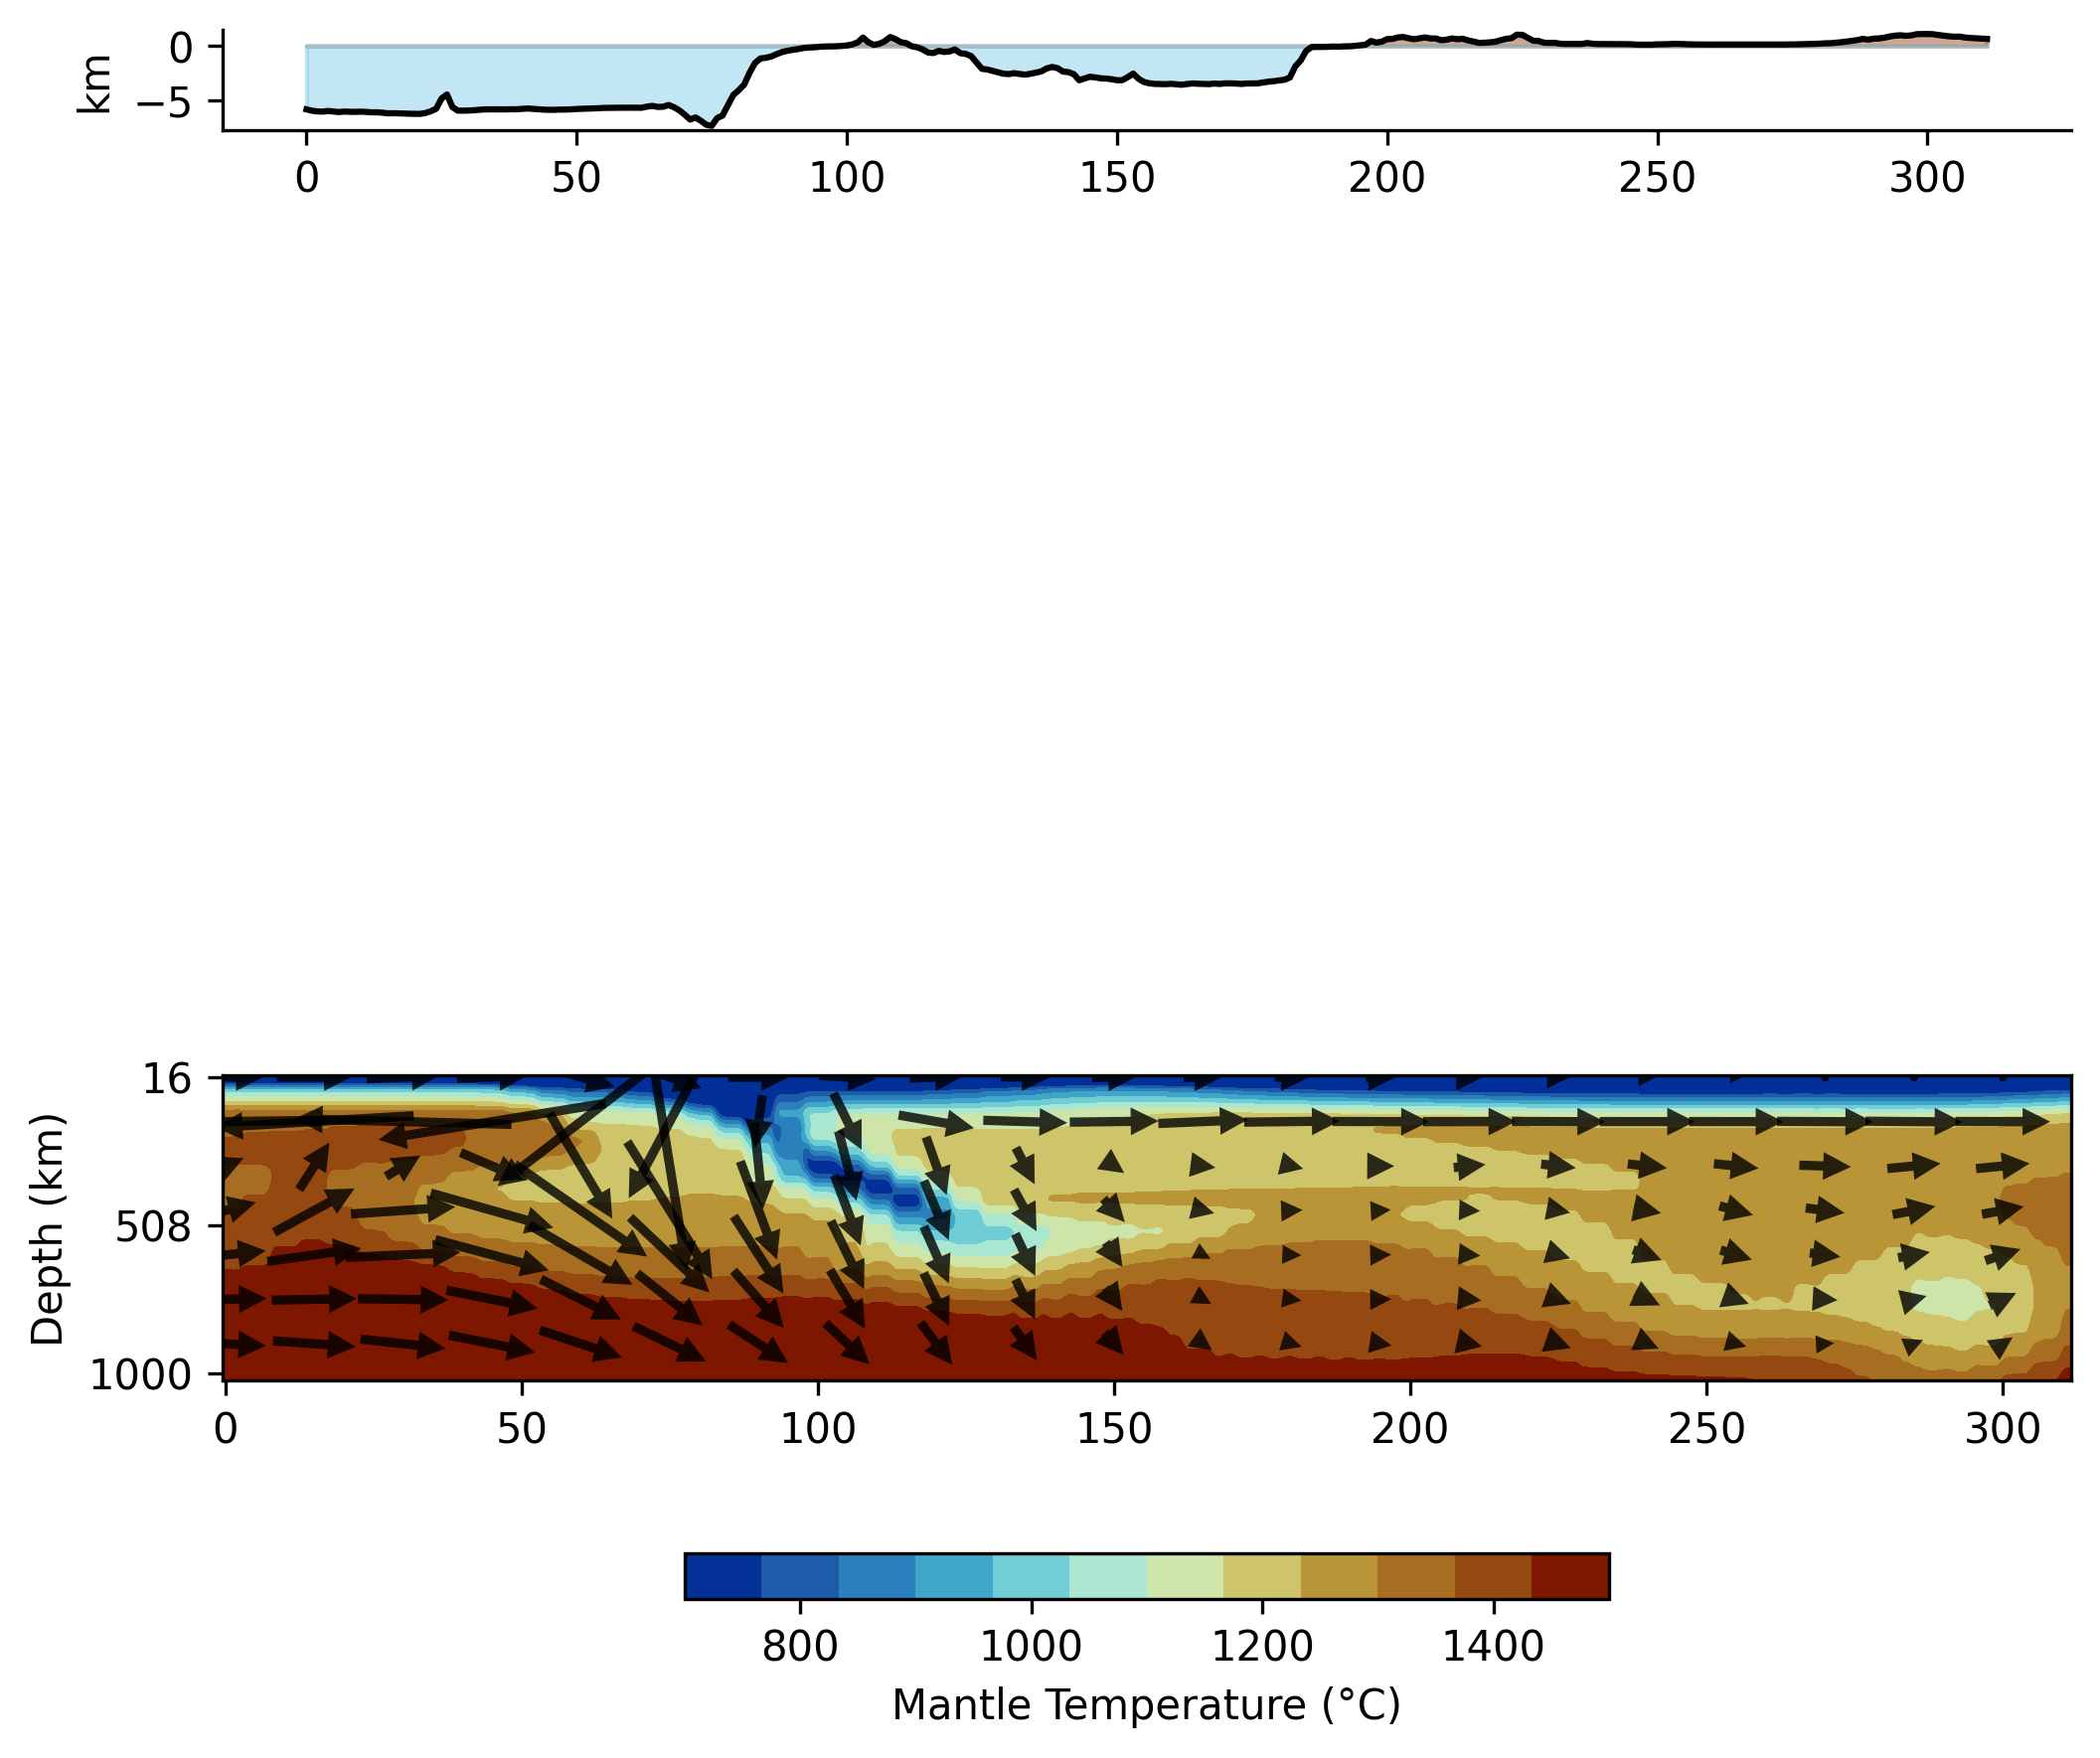

In [11]:

profile_number=2




# Define the number of classes
num_classes = 12

# Choose a continuous colormap (e.g., 'viridis')
continuous_cmap = cmc.roma_r

# Create a discrete colormap
discrete_cmap = ListedColormap(continuous_cmap(np.linspace(0, 1, num_classes)))

# Define the boundaries for the classes
bounds = np.linspace(0, 1, num_classes + 1)
norm = BoundaryNorm(bounds, discrete_cmap.N)




n=profile_number-1
create_directory_if_not_exists(f"{OUTPUT_FOLDER}/ElevationProfiles")
create_directory_if_not_exists(f"{OUTPUT_FOLDER}/MantleProfiles")
all_profiles=pygplates.FeatureCollection(f"Profiles/Profiles.shp")

reconstruction_time=0
names_MT=[f"/Volumes/Satyam/Paleotopography/STLR410MaM1/temp_dimensional/{reconstruction_time}/Mantle_Temp_{depth}.tif" for depth in MANTLE_depths]
names_VZ=[f"/Volumes/Satyam/Paleotopography/STLR410MaM1/vz_dimensional/{reconstruction_time}/Mantle_Velocity_{depth}.tif" for depth in MANTLE_depths]
names_VX=[f"/Volumes/Satyam/Paleotopography/STLR410MaM1/vx_dimensional/{reconstruction_time}/Mantle_Velocity_X_{depth}.tif" for depth in MANTLE_depths]
names_VY=[f"/Volumes/Satyam/Paleotopography/STLR410MaM1/vy_dimensional/{reconstruction_time}/Mantle_Velocity_Y_{depth}.tif" for depth in MANTLE_depths]
etopo_name=ETOPO_FILE


pygplates.reconstruct(all_profiles,PK.rotation_model,f"Profiles/tmp.shp",reconstruction_time,anchor_plate_id=PK.anchor_plate_id)

profile=gpd.read_file(f"Profiles/tmp.shp")

# Example usage
start_lat = profile.iloc[n].geometry.xy[1][0]
start_lon = profile.iloc[n].geometry.xy[0][0]
end_lat = profile.iloc[n].geometry.xy[1][1]
end_lon = profile.iloc[n].geometry.xy[0][1]
interval = 10

profile_latitudes, profile_longitudes = create_profile(start_lat, start_lon, end_lat, end_lon, interval)

i=0
etopo=[]
interp_depth=np.arange(16, 1040, 10)
new_mantle_temperatures=np.zeros([len(profile_longitudes),len(interp_depth)])
new_mantle_velocitiesx=np.zeros([len(profile_longitudes),len(interp_depth)])
new_mantle_velocitiesy=np.zeros([len(profile_longitudes),len(interp_depth)])
new_mantle_velocitiesz=np.zeros([len(profile_longitudes),len(interp_depth)])

for target_lon, target_lat in zip(profile_longitudes, profile_latitudes):
    mantle_temperatures=[]
    mantle_velocitiesx=[]
    mantle_velocitiesy=[]
    mantle_velocitiesz=[]
    etopo.append(value_at_point(etopo_name, target_lat, target_lon))
    
    for name in names_MT:

        mantle_temperatures.append(value_at_point(name, target_lat, target_lon))
    
    for name in names_VZ:

        mantle_velocitiesz.append(value_at_point(name, target_lat, target_lon))
    
    for name in names_VX:

        mantle_velocitiesx.append(value_at_point(name, target_lat, target_lon))
    for name in names_VY:

        mantle_velocitiesy.append(value_at_point(name, target_lat, target_lon))
    
    new_mantle_temperatures[i,:],_=interpolate_value(MANTLE_depths,mantle_temperatures,interp_depth)
    new_mantle_velocitiesx[i,:],_=interpolate_value(MANTLE_depths,mantle_velocitiesx,interp_depth)
    new_mantle_velocitiesy[i,:],_=interpolate_value(MANTLE_depths,mantle_velocitiesy,interp_depth)
    new_mantle_velocitiesz[i,:],_=interpolate_value(MANTLE_depths,mantle_velocitiesz,interp_depth)
    i=i+1
# Assume etopo and other required variables (new_mantle_temperatures, etc.) are defined as in your provided code

# Initialize figure and gridspec
fig = plt.figure(figsize=(8, 8),dpi=300)
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3], hspace=0.4)

# First subplot - Elevation profile
ax2 = fig.add_subplot(gs[0])
ax2.plot(np.array(etopo) / 1000, color='black')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.tick_params(left=True, labelleft=True)
ax2.tick_params(bottom=True, labelbottom=True)
ax2.set_ylabel('km')
# ax2.set_xlabel(f'Profile {n + 1}')
ax2.set_aspect(2.0)
ax2.fill_between(range(len(etopo)), np.maximum(np.array(etopo) / 1000, 0), color='sienna', alpha=0.5)
ax2.fill_between(range(len(etopo)), np.minimum(np.array(etopo) / 1000, 0), color='skyblue', alpha=0.5)
ax2.grid(False)
# # Second subplot - Mantle Temperature Profile
ax3 = fig.add_subplot(gs[1])
vs_plot = new_mantle_temperatures
im = ax3.imshow(vs_plot.T, cmap=discrete_cmap, interpolation='bicubic',vmin=700,vmax=1500)

x = np.arange(0, vs_plot.shape[0])
y = np.arange(0, vs_plot.shape[1])
X, Y = np.meshgrid(x, y)

# # Plot contour lines
# levels = np.array([1000, 1100, 1200, 1300, 1400])
# contour = ax3.contour(X.T, Y.T, vs_plot, levels=levels, colors='black', linewidths=0.5, linestyles='dashdot')
# plt.clabel(contour, fmt='%.2f', colors='black')

# # Set labels and colorbar
ax3.set_ylabel("Depth (km)")
# ax3.set_xlabel(f"Profile DD' (km)")
cbar = fig.colorbar(im, ax=ax3, orientation='horizontal', shrink=0.5)
cbar.set_label("Mantle Temperature (°C)")

# Set aspect ratio
ax3.grid(False)
ax3.set_aspect(0.5)

# # Format axes
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(16 + x * (1040 - 16) / 104)))
# ax3.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x * 111 * profile[n].length / len(profile_latitudes))))

# Plot velocity vectors, skipping every 4 rows and columns
skip =15
quiver = ax3.quiver(X[::skip, ::skip], Y[::skip, ::skip], new_mantle_velocitiesx[::skip, ::skip].T, new_mantle_velocitiesz[::skip, ::skip].T, 
                    scale=40, color='black', alpha=0.8,    width=0.005,  # Adjust arrow width
    headlength=3,  # Arrowhead length
    headaxislength=3,  # Arrowhead length along the axis
    headwidth=3,  # Width of the arrowhead
    pivot='middle')  # Arrows pivot around the middle)

plt.show()


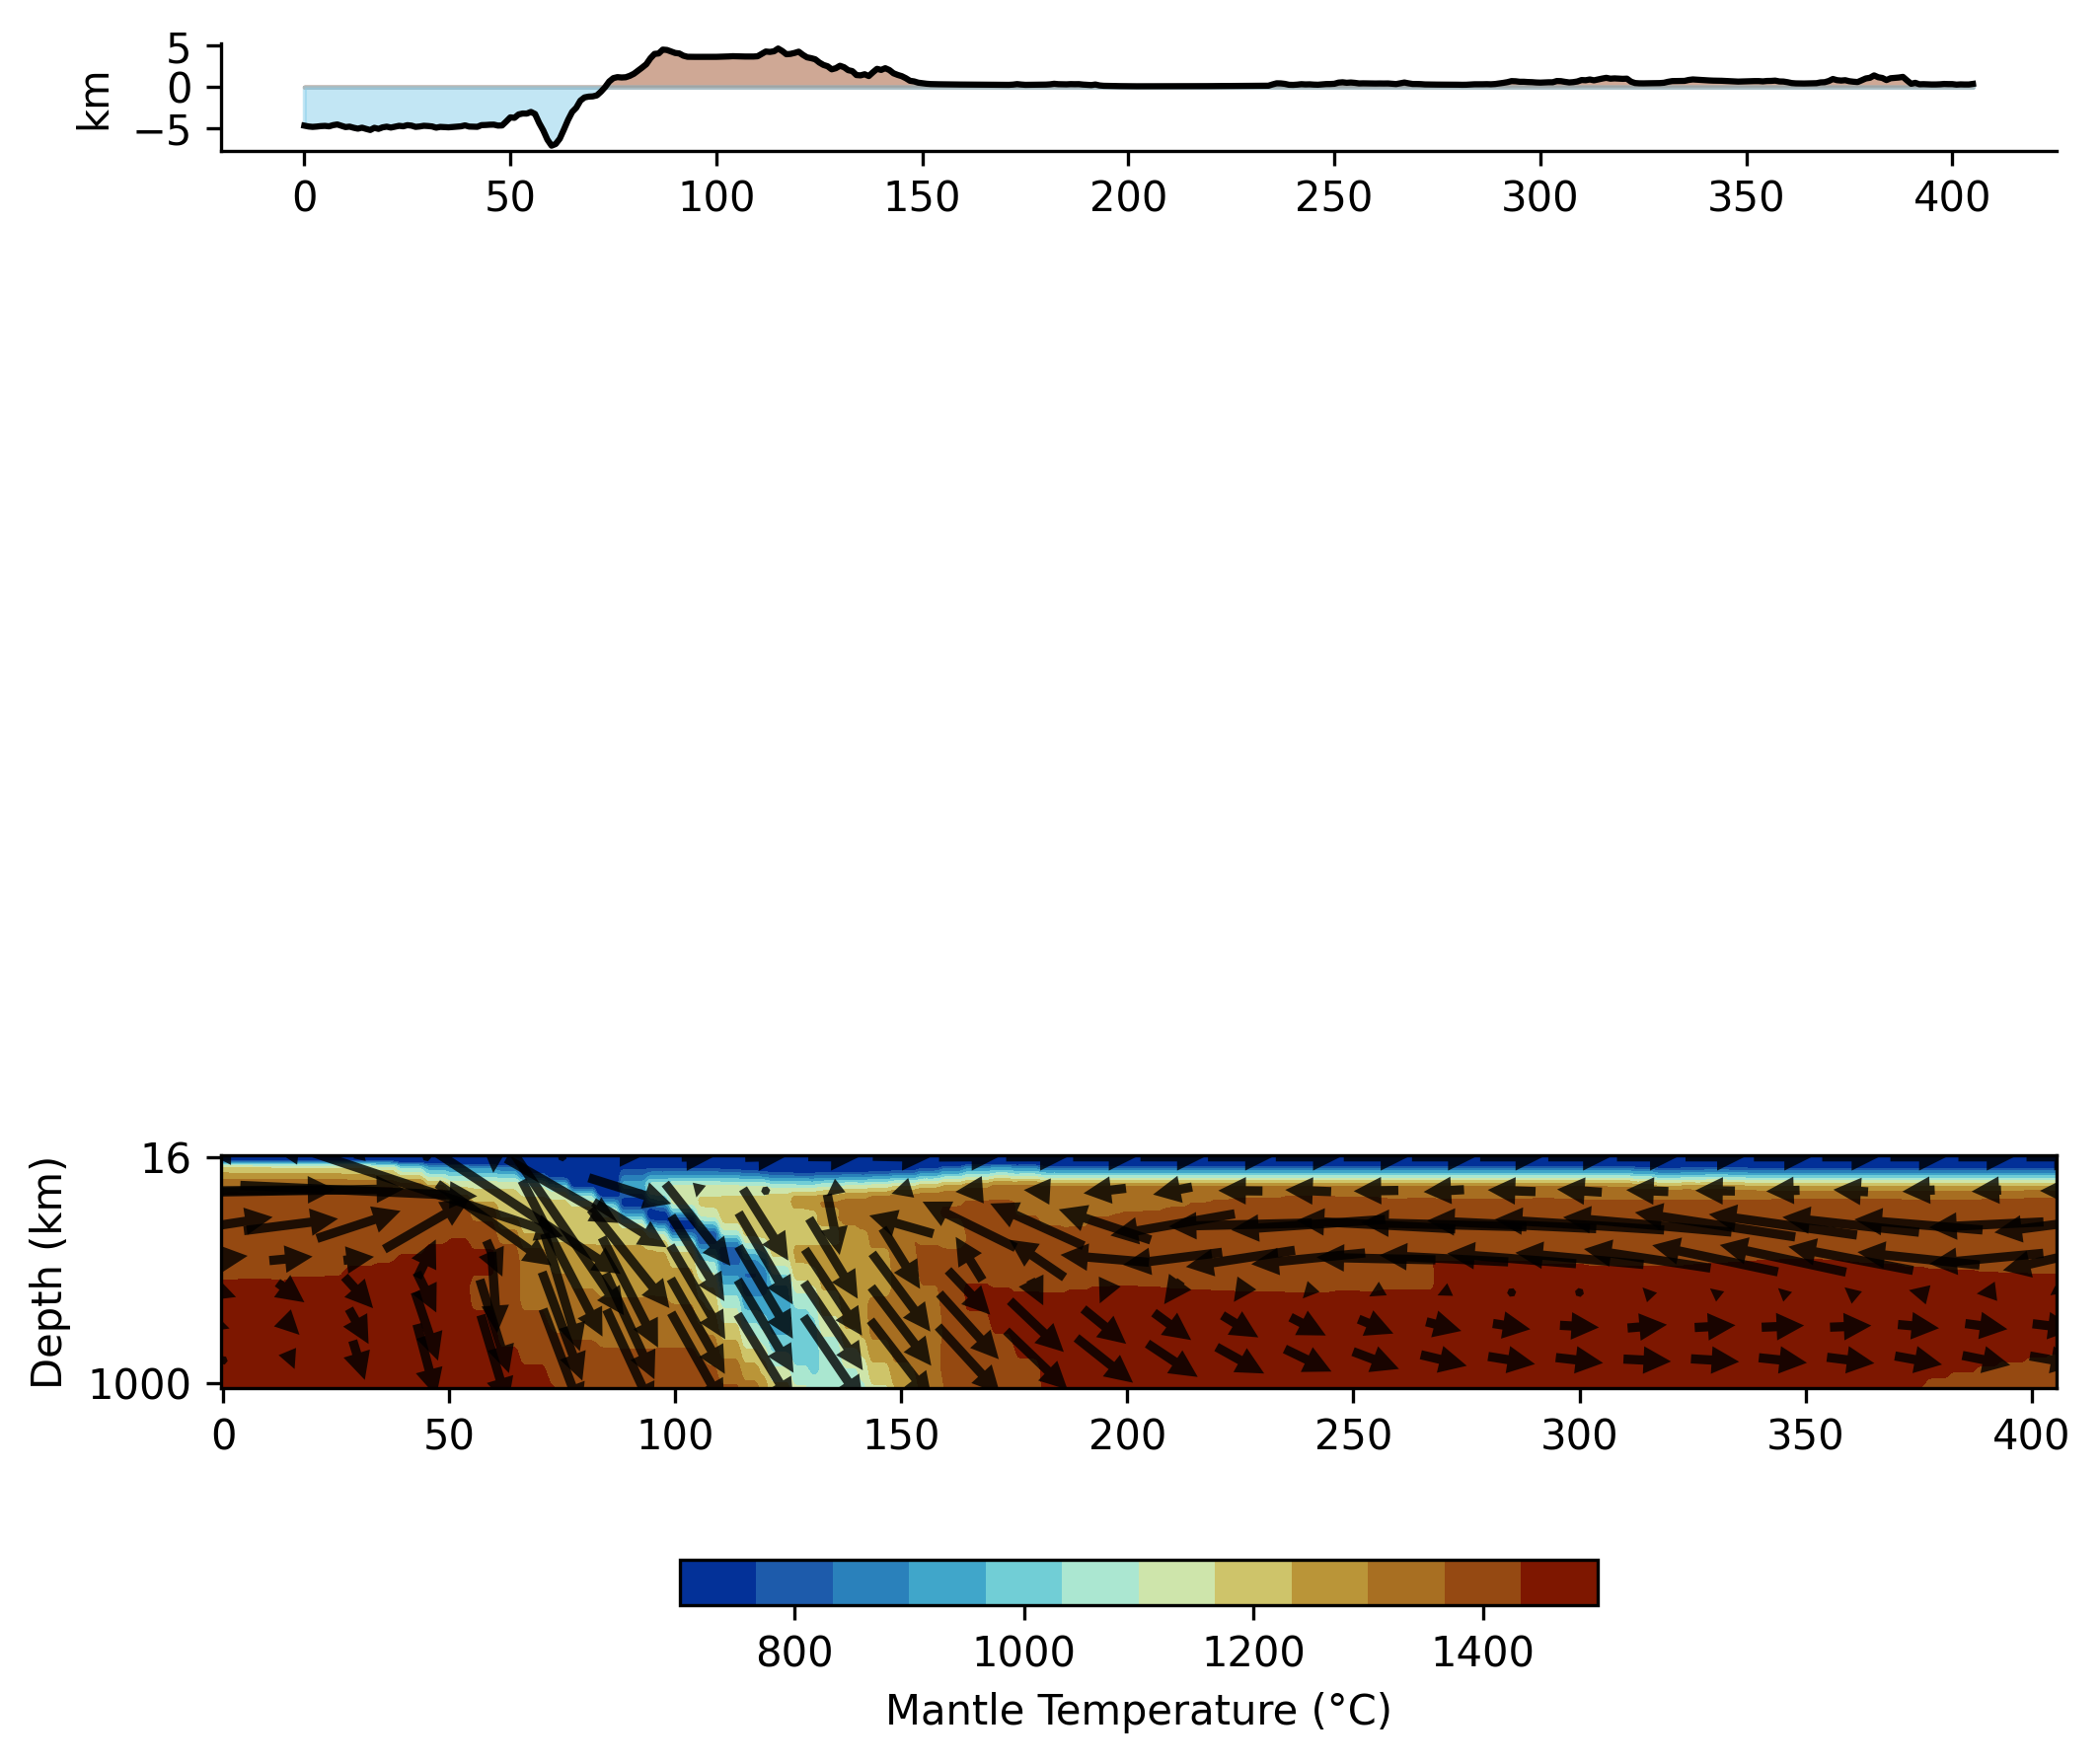

In [12]:

profile_number=3




# Define the number of classes
num_classes = 12

# Choose a continuous colormap (e.g., 'viridis')
continuous_cmap = cmc.roma_r

# Create a discrete colormap
discrete_cmap = ListedColormap(continuous_cmap(np.linspace(0, 1, num_classes)))

# Define the boundaries for the classes
bounds = np.linspace(0, 1, num_classes + 1)
norm = BoundaryNorm(bounds, discrete_cmap.N)




n=profile_number-1
create_directory_if_not_exists(f"{OUTPUT_FOLDER}/ElevationProfiles")
create_directory_if_not_exists(f"{OUTPUT_FOLDER}/MantleProfiles")
all_profiles=pygplates.FeatureCollection(f"Profiles/Profiles.shp")

reconstruction_time=0
names_MT=[f"/Volumes/Satyam/Paleotopography/STLR410MaM1/temp_dimensional/{reconstruction_time}/Mantle_Temp_{depth}.tif" for depth in MANTLE_depths]
names_VZ=[f"/Volumes/Satyam/Paleotopography/STLR410MaM1/vz_dimensional/{reconstruction_time}/Mantle_Velocity_{depth}.tif" for depth in MANTLE_depths]
names_VX=[f"/Volumes/Satyam/Paleotopography/STLR410MaM1/vx_dimensional/{reconstruction_time}/Mantle_Velocity_X_{depth}.tif" for depth in MANTLE_depths]
names_VY=[f"/Volumes/Satyam/Paleotopography/STLR410MaM1/vy_dimensional/{reconstruction_time}/Mantle_Velocity_Y_{depth}.tif" for depth in MANTLE_depths]
etopo_name=ETOPO_FILE


pygplates.reconstruct(all_profiles,PK.rotation_model,f"Profiles/tmp.shp",reconstruction_time,anchor_plate_id=PK.anchor_plate_id)

profile=gpd.read_file(f"Profiles/tmp.shp")

# Example usage
start_lat = profile.iloc[n].geometry.xy[1][0]
start_lon = profile.iloc[n].geometry.xy[0][0]
end_lat = profile.iloc[n].geometry.xy[1][1]
end_lon = profile.iloc[n].geometry.xy[0][1]
interval = 10

profile_latitudes, profile_longitudes = create_profile(start_lat, start_lon, end_lat, end_lon, interval)

i=0
etopo=[]
interp_depth=np.arange(16, 1040, 10)
new_mantle_temperatures=np.zeros([len(profile_longitudes),len(interp_depth)])
new_mantle_velocitiesx=np.zeros([len(profile_longitudes),len(interp_depth)])
new_mantle_velocitiesy=np.zeros([len(profile_longitudes),len(interp_depth)])
new_mantle_velocitiesz=np.zeros([len(profile_longitudes),len(interp_depth)])

for target_lon, target_lat in zip(profile_longitudes, profile_latitudes):
    mantle_temperatures=[]
    mantle_velocitiesx=[]
    mantle_velocitiesy=[]
    mantle_velocitiesz=[]
    etopo.append(value_at_point(etopo_name, target_lat, target_lon))
    
    for name in names_MT:

        mantle_temperatures.append(value_at_point(name, target_lat, target_lon))
    
    for name in names_VZ:

        mantle_velocitiesz.append(value_at_point(name, target_lat, target_lon))
    
    for name in names_VX:

        mantle_velocitiesx.append(value_at_point(name, target_lat, target_lon))
    for name in names_VY:

        mantle_velocitiesy.append(value_at_point(name, target_lat, target_lon))
    
    new_mantle_temperatures[i,:],_=interpolate_value(MANTLE_depths,mantle_temperatures,interp_depth)
    new_mantle_velocitiesx[i,:],_=interpolate_value(MANTLE_depths,mantle_velocitiesx,interp_depth)
    new_mantle_velocitiesy[i,:],_=interpolate_value(MANTLE_depths,mantle_velocitiesy,interp_depth)
    new_mantle_velocitiesz[i,:],_=interpolate_value(MANTLE_depths,mantle_velocitiesz,interp_depth)
    i=i+1
# Assume etopo and other required variables (new_mantle_temperatures, etc.) are defined as in your provided code

# Initialize figure and gridspec
fig = plt.figure(figsize=(8, 8),dpi=300)
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3], hspace=0.4)

# First subplot - Elevation profile
ax2 = fig.add_subplot(gs[0])
ax2.plot(np.array(etopo) / 1000, color='black')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.tick_params(left=True, labelleft=True)
ax2.tick_params(bottom=True, labelbottom=True)
ax2.set_ylabel('km')
# ax2.set_xlabel(f'Profile {n + 1}')
ax2.set_aspect(2.0)
ax2.fill_between(range(len(etopo)), np.maximum(np.array(etopo) / 1000, 0), color='sienna', alpha=0.5)
ax2.fill_between(range(len(etopo)), np.minimum(np.array(etopo) / 1000, 0), color='skyblue', alpha=0.5)
ax2.grid(False)
# # Second subplot - Mantle Temperature Profile
ax3 = fig.add_subplot(gs[1])
vs_plot = new_mantle_temperatures
im = ax3.imshow(vs_plot.T, cmap=discrete_cmap, interpolation='bicubic',vmin=700,vmax=1500)

x = np.arange(0, vs_plot.shape[0])
y = np.arange(0, vs_plot.shape[1])
X, Y = np.meshgrid(x, y)

# # Plot contour lines
# levels = np.array([1000, 1100, 1200, 1300, 1400])
# contour = ax3.contour(X.T, Y.T, vs_plot, levels=levels, colors='black', linewidths=0.5, linestyles='dashdot')
# plt.clabel(contour, fmt='%.2f', colors='black')

# # Set labels and colorbar
ax3.set_ylabel("Depth (km)")
# ax3.set_xlabel(f"Profile DD' (km)")
cbar = fig.colorbar(im, ax=ax3, orientation='horizontal', shrink=0.5)
cbar.set_label("Mantle Temperature (°C)")

# Set aspect ratio
ax3.grid(False)
ax3.set_aspect(0.5)

# # Format axes
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(16 + x * (1040 - 16) / 104)))
# ax3.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(x * 111 * profile[n].length / len(profile_latitudes))))

# Plot velocity vectors, skipping every 4 rows and columns
skip =15
quiver = ax3.quiver(X[::skip, ::skip], Y[::skip, ::skip], new_mantle_velocitiesx[::skip, ::skip].T, new_mantle_velocitiesz[::skip, ::skip].T, 
                    scale=40, color='black', alpha=0.8,    width=0.005,  # Adjust arrow width
    headlength=3,  # Arrowhead length
    headaxislength=3,  # Arrowhead length along the axis
    headwidth=3,  # Width of the arrowhead
    pivot='middle')  # Arrows pivot around the middle)

plt.show()
